In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [10.0,8.0]

## Reading in the Data

In [46]:
def pk_function(filename):
    pk = np.loadtxt(filename)
    return interp1d(pk[:,0],pk[:,1])

params = np.asarray([[0.01,3.00,0.30],[0.1,2,0.3],[0.1,3,0.1],[0.1,3,0.3],[0.1,3,0.5],[0.1,8,0.3],[0.2,3,0.3],[0.5,3,0.3]])

pk_cdm_0p1 = pk_function('./../output/MTH_paper_ICs/LCDMNur0.100_pk.dat')
pk_cdm_0p3 = pk_function('./../output/MTH_paper_ICs/LCDMNur0.300_pk.dat')
pk_cdm_0p5 = pk_function('./../output/MTH_paper_ICs/LCDMNur0.500_pk.dat')

pk_mth_r0p01_v3_N0p3 = pk_function('./../output/TwinOut_r0.010_v3.00_N0.30pk.dat')
pk_mth_r0p1_v2_N0p3 = pk_function('./../output/TwinOut_r0.100_v2.00_N0.30pk.dat')
pk_mth_r0p1_v3_N0p1 = pk_function('./../output/TwinOut_r0.100_v3.00_N0.10pk.dat')
pk_mth_r0p1_v3_N0p3 = pk_function('./../output/TwinOut_r0.100_v3.00_N0.30pk.dat')
pk_mth_r0p1_v3_N0p5 = pk_function('./../output/TwinOut_r0.100_v3.00_N0.50pk.dat')
pk_mth_r0p1_v8_N0p3 = pk_function('./../output/TwinOut_r0.100_v8.00_N0.30pk.dat')
pk_mth_r0p2_v3_N0p3 = pk_function('./../output/TwinOut_r0.200_v3.00_N0.30pk.dat')
pk_mth_r0p5_v3_N0p3 = pk_function('./../output/TwinOut_r0.500_v3.00_N0.30pk.dat')

pks_mth = [pk_mth_r0p01_v3_N0p3,pk_mth_r0p1_v2_N0p3,pk_mth_r0p1_v3_N0p1,pk_mth_r0p1_v3_N0p3,pk_mth_r0p1_v3_N0p5,pk_mth_r0p1_v8_N0p3,pk_mth_r0p2_v3_N0p3,pk_mth_r0p5_v3_N0p3]
pks_cdm = [pk_cdm_0p1,pk_cdm_0p3,pk_cdm_0p5]

#ini_pk_cdm_0p3 = pk_function('./../iniPaperData/output/LCDMNur0.300_pk.dat')
#ini_pk_mth_r0p2_v3_N0p3 = pk_function('./../iniPaperData/output/TwinOut_r0.200_v3.00_N0.30pk.dat')


## Matter Power Spectra

<IPython.core.display.Javascript object>


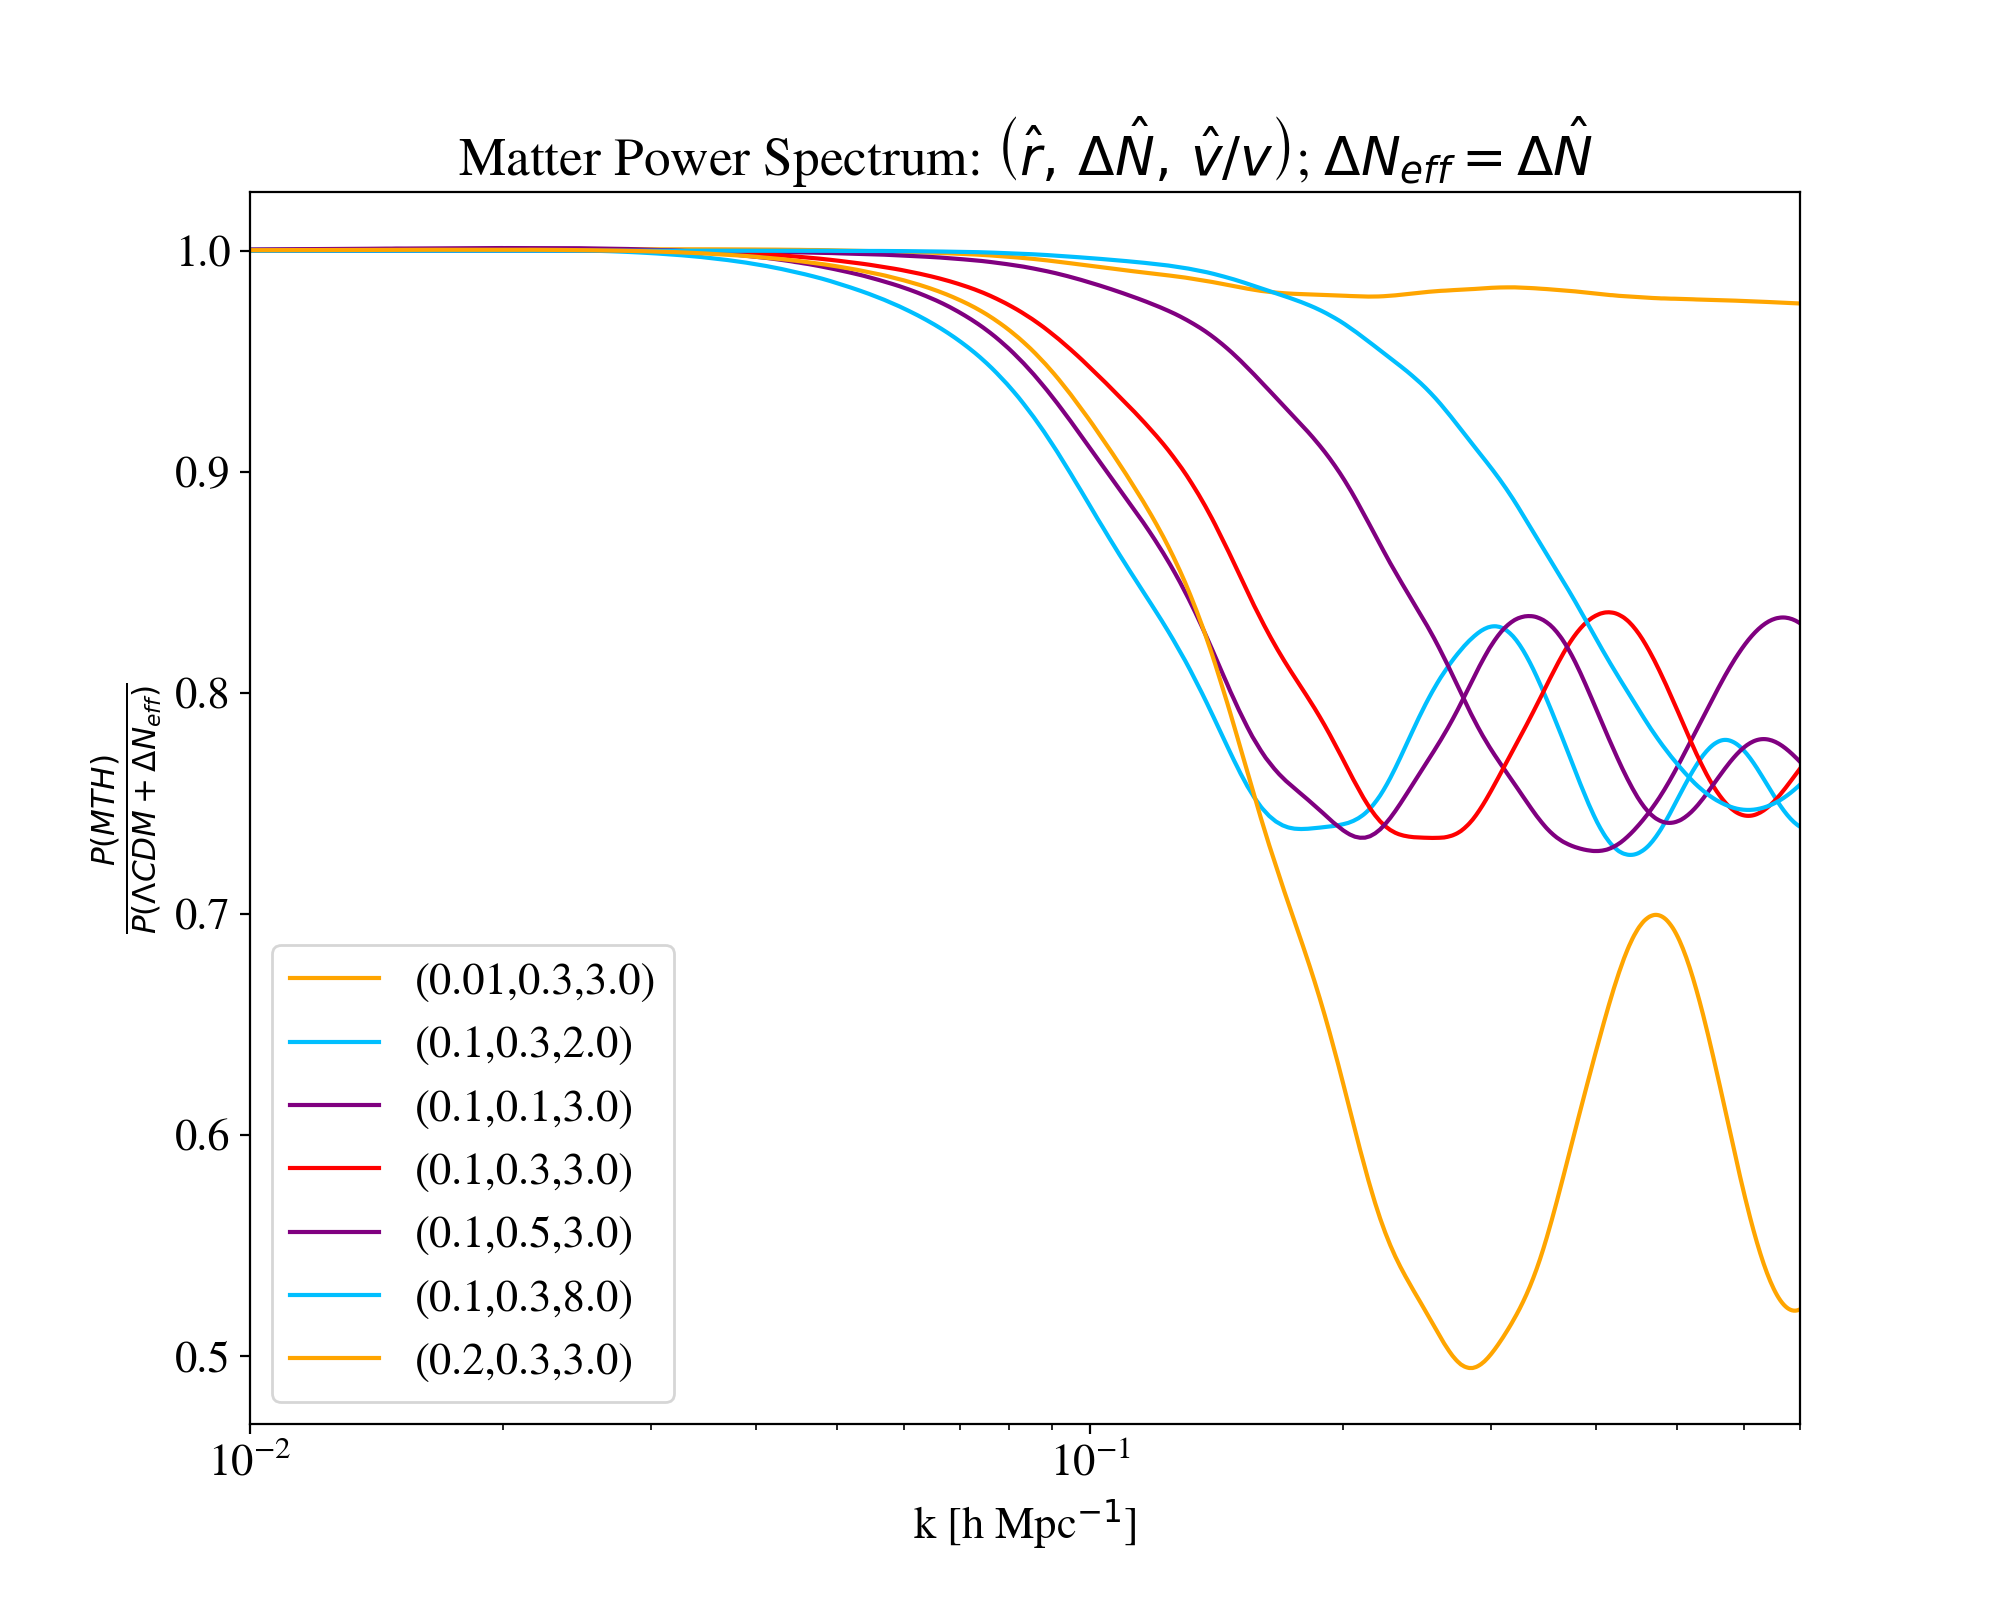

In [61]:

kk = np.logspace(-2,0,1000)

plt.figure()

colors = ['orange','deepskyblue','purple','red','purple','deepskyblue','orange','orange']
mth_indices = [0,1,2,3,4,5,6]
cdm_indices = [1,1,0,1,2,1,1]

for i,index in enumerate(mth_indices):
    plt.plot(kk,pks_mth[index](kk)/pks_cdm[cdm_indices[i]](kk),color=colors[index],label=fr'({params[index][0]},{params[index][2]},{params[index][1]})')

plt.xlabel(r'k [h Mpc$^{-1}$]')
plt.ylabel(r'$\frac{P(MTH)}{P(\Lambda CDM + \Delta N_{eff})}$')
plt.title(r'Matter Power Spectrum: $\left(\hat{r},\, \Delta\hat{N},\, \hat{v}/v\right)$; $\Delta N_{eff} = \Delta \hat{N}$')
plt.xlim([0.01,0.7])
plt.xscale('log')
#plt.ylim([0.45,1.02])
plt.legend()

## CMB Spectra

<IPython.core.display.Javascript object>


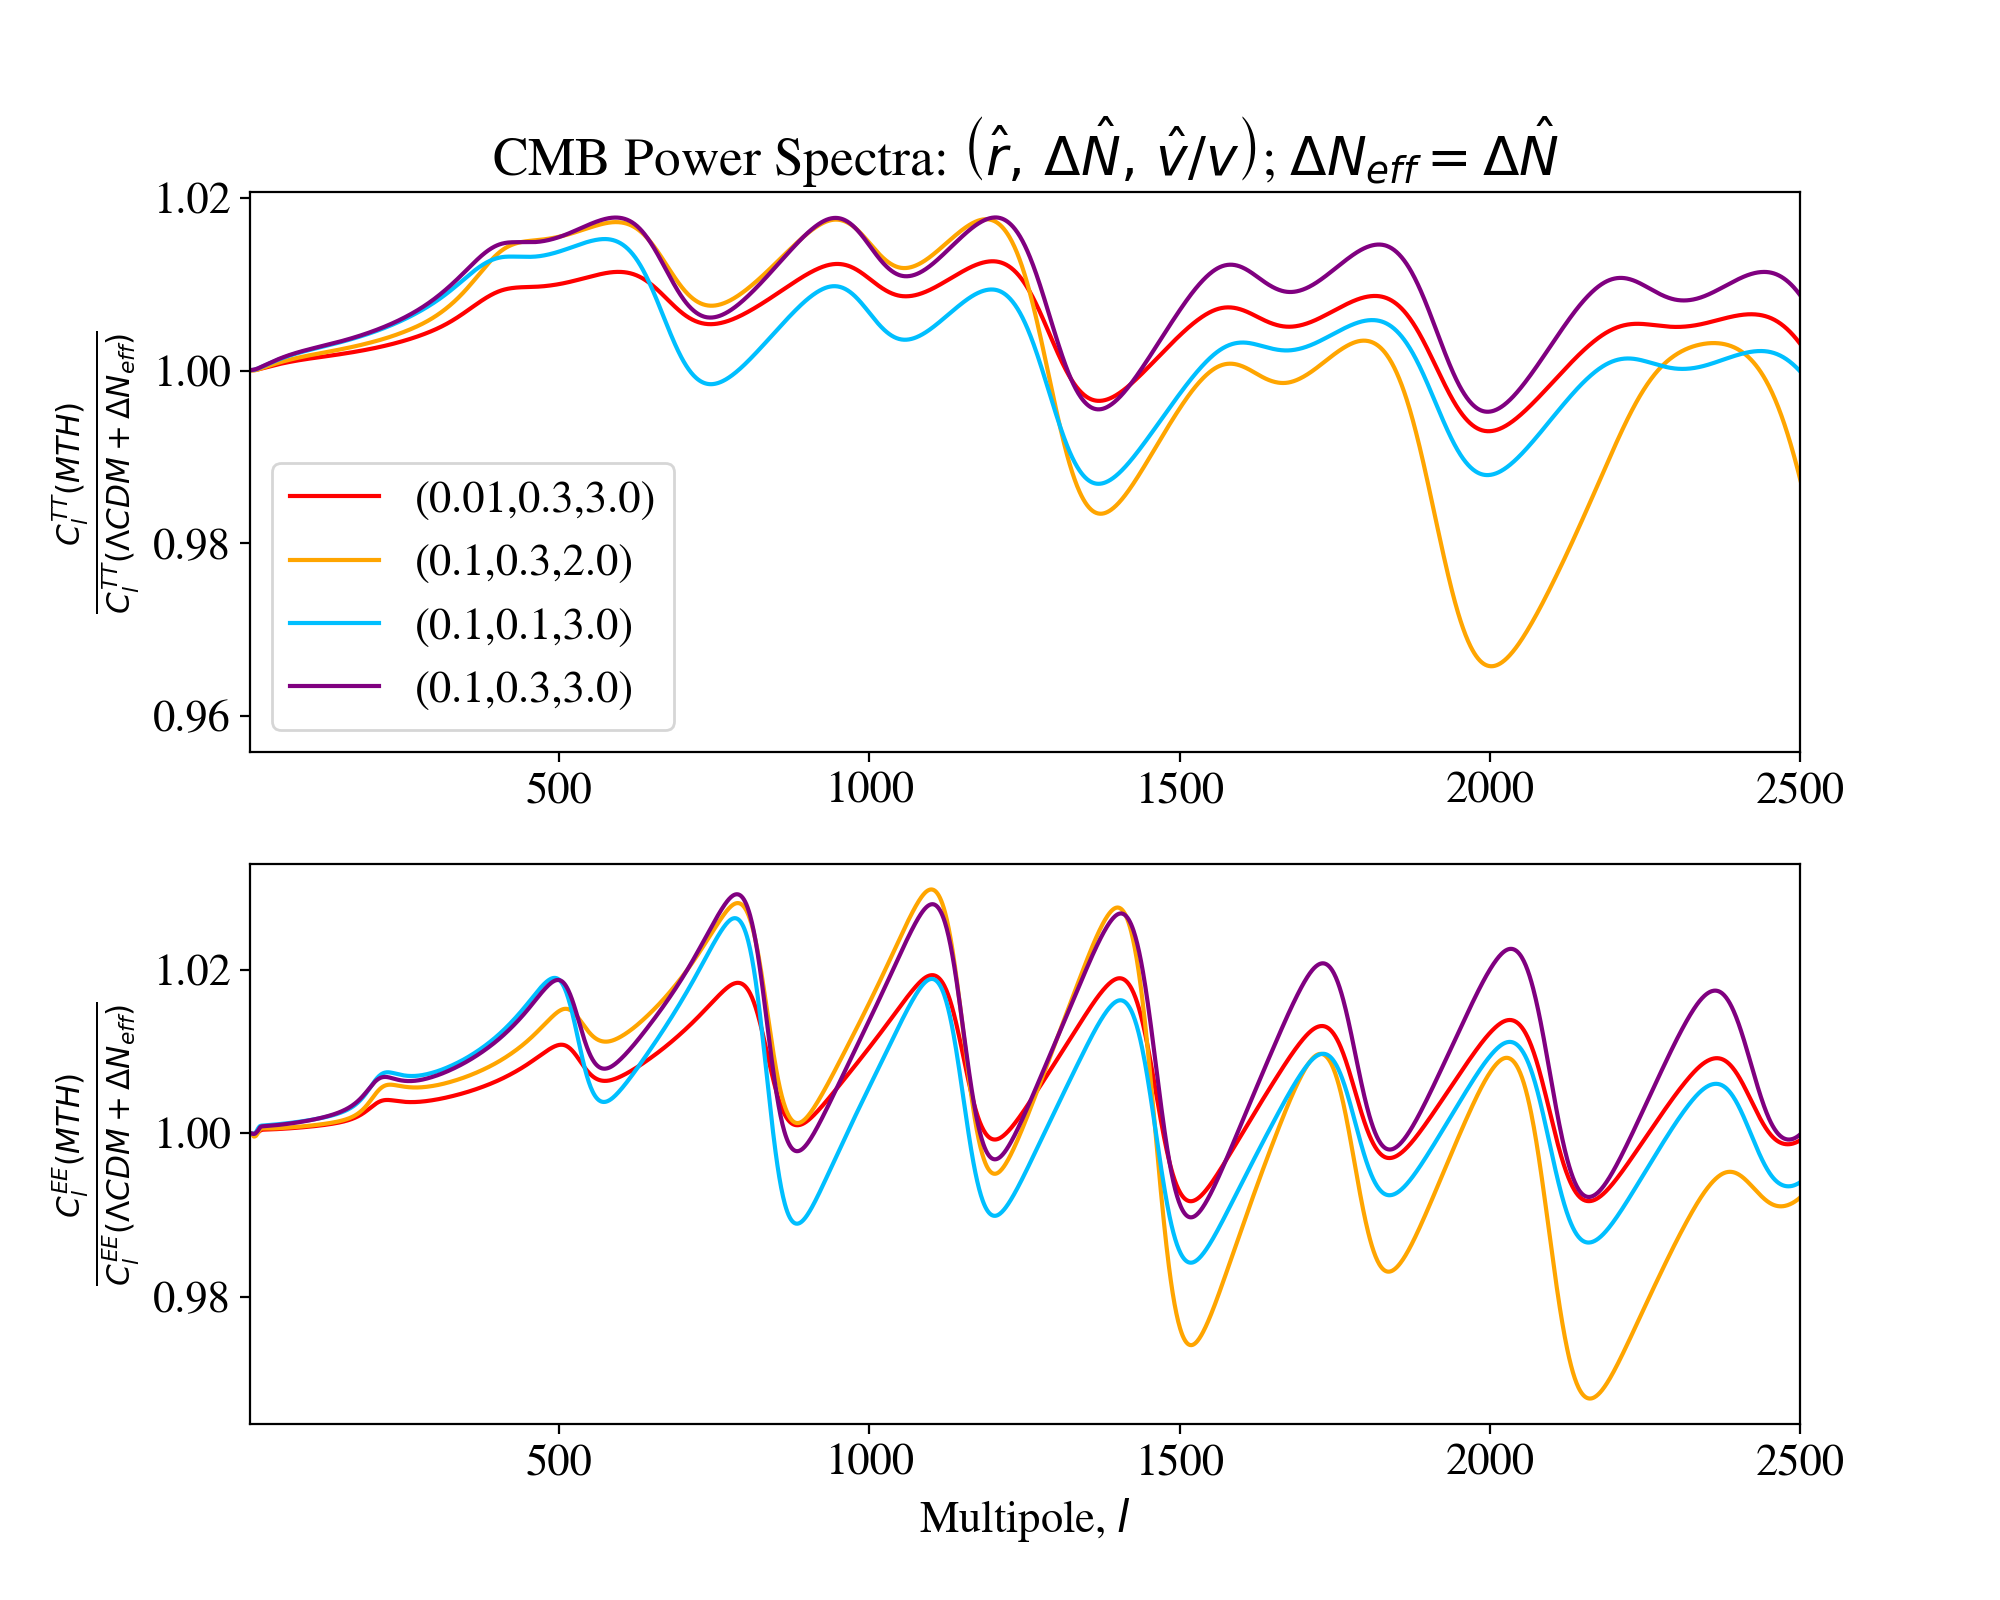

In [75]:
# Reading in the data

cl_cdm_0p1 = np.loadtxt('./../output/MTH_paper_ICs/LCDMNur0.100_cl.dat')
cl_cdm_0p3 = np.loadtxt('./../output/MTH_paper_ICs/LCDMNur0.300_cl.dat')
cl_cdm_0p5 = np.loadtxt('./../output/MTH_paper_ICs/LCDMNur0.500_cl.dat')

cl_mth_r0p1_v3_N0p3 = np.loadtxt('./../output/TwinOut_r0.100_v3.00_N0.30cl.dat')
cl_mth_r0p5_v3_N0p3 = np.loadtxt('./../output/TwinOut_r0.500_v3.00_N0.30cl.dat')
cl_mth_r0p1_v2_N0p3 = np.loadtxt('./../output/TwinOut_r0.100_v2.00_N0.30cl.dat')
cl_mth_r0p1_v3_N0p5 = np.loadtxt('./../output/TwinOut_r0.100_v3.00_N0.50cl.dat')

cls_mth = [cl_mth_r0p1_v3_N0p3,cl_mth_r0p5_v3_N0p3,cl_mth_r0p1_v2_N0p3,cl_mth_r0p1_v3_N0p5]
cls_cdm = [cl_cdm_0p1,cl_cdm_0p3,cl_cdm_0p5]

#print((cl_cdm_0p1[:,1]))

params_cmb = [[0.1,3,0.3],[0.5,3,0.3],[0.1,2,0.3],[0.1,3,0.5]]
colors_cmb = ['red','orange','deepskyblue','purple']

mth_indices = [0,1,2,3]
cdm_indices = [1,1,1,2]

fig, axs = plt.subplots(2)

for i,index in enumerate(mth_indices):
    axs[0].plot(cls_mth[index][:,0],cls_mth[index][:,1]/cls_cdm[cdm_indices[i]][:,1],color=colors_cmb[index],label=fr'({params[index][0]},{params[index][2]},{params[index][1]})')

for i,index in enumerate(mth_indices):
    axs[1].plot(cls_mth[index][:,0],cls_mth[index][:,2]/cls_cdm[cdm_indices[i]][:,2],color=colors_cmb[index],label=fr'({params[index][0]},{params[index][2]},{params[index][1]})')


    
    
axs[0].set_xlim([2,2500]); axs[1].set_xlim([2,2500]);
axs[0].set_title(r"CMB Power Spectra: $\left(\hat{r},\, \Delta\hat{N},\, \hat{v}/v\right)$; $\Delta N_{eff} = \Delta \hat{N}$")
axs[0].set_ylabel(r'$\frac{C^{TT}_l(MTH)}{C^{TT}_l(\Lambda CDM + \Delta N_{eff})}$')
axs[1].set_ylabel(r'$\frac{C^{EE}_l(MTH)}{C^{EE}_l(\Lambda CDM + \Delta N_{eff})}$')
axs[1].set_xlabel(r'Multipole, $l$')
axs[0].legend()

## Transfer Function

<IPython.core.display.Javascript object>


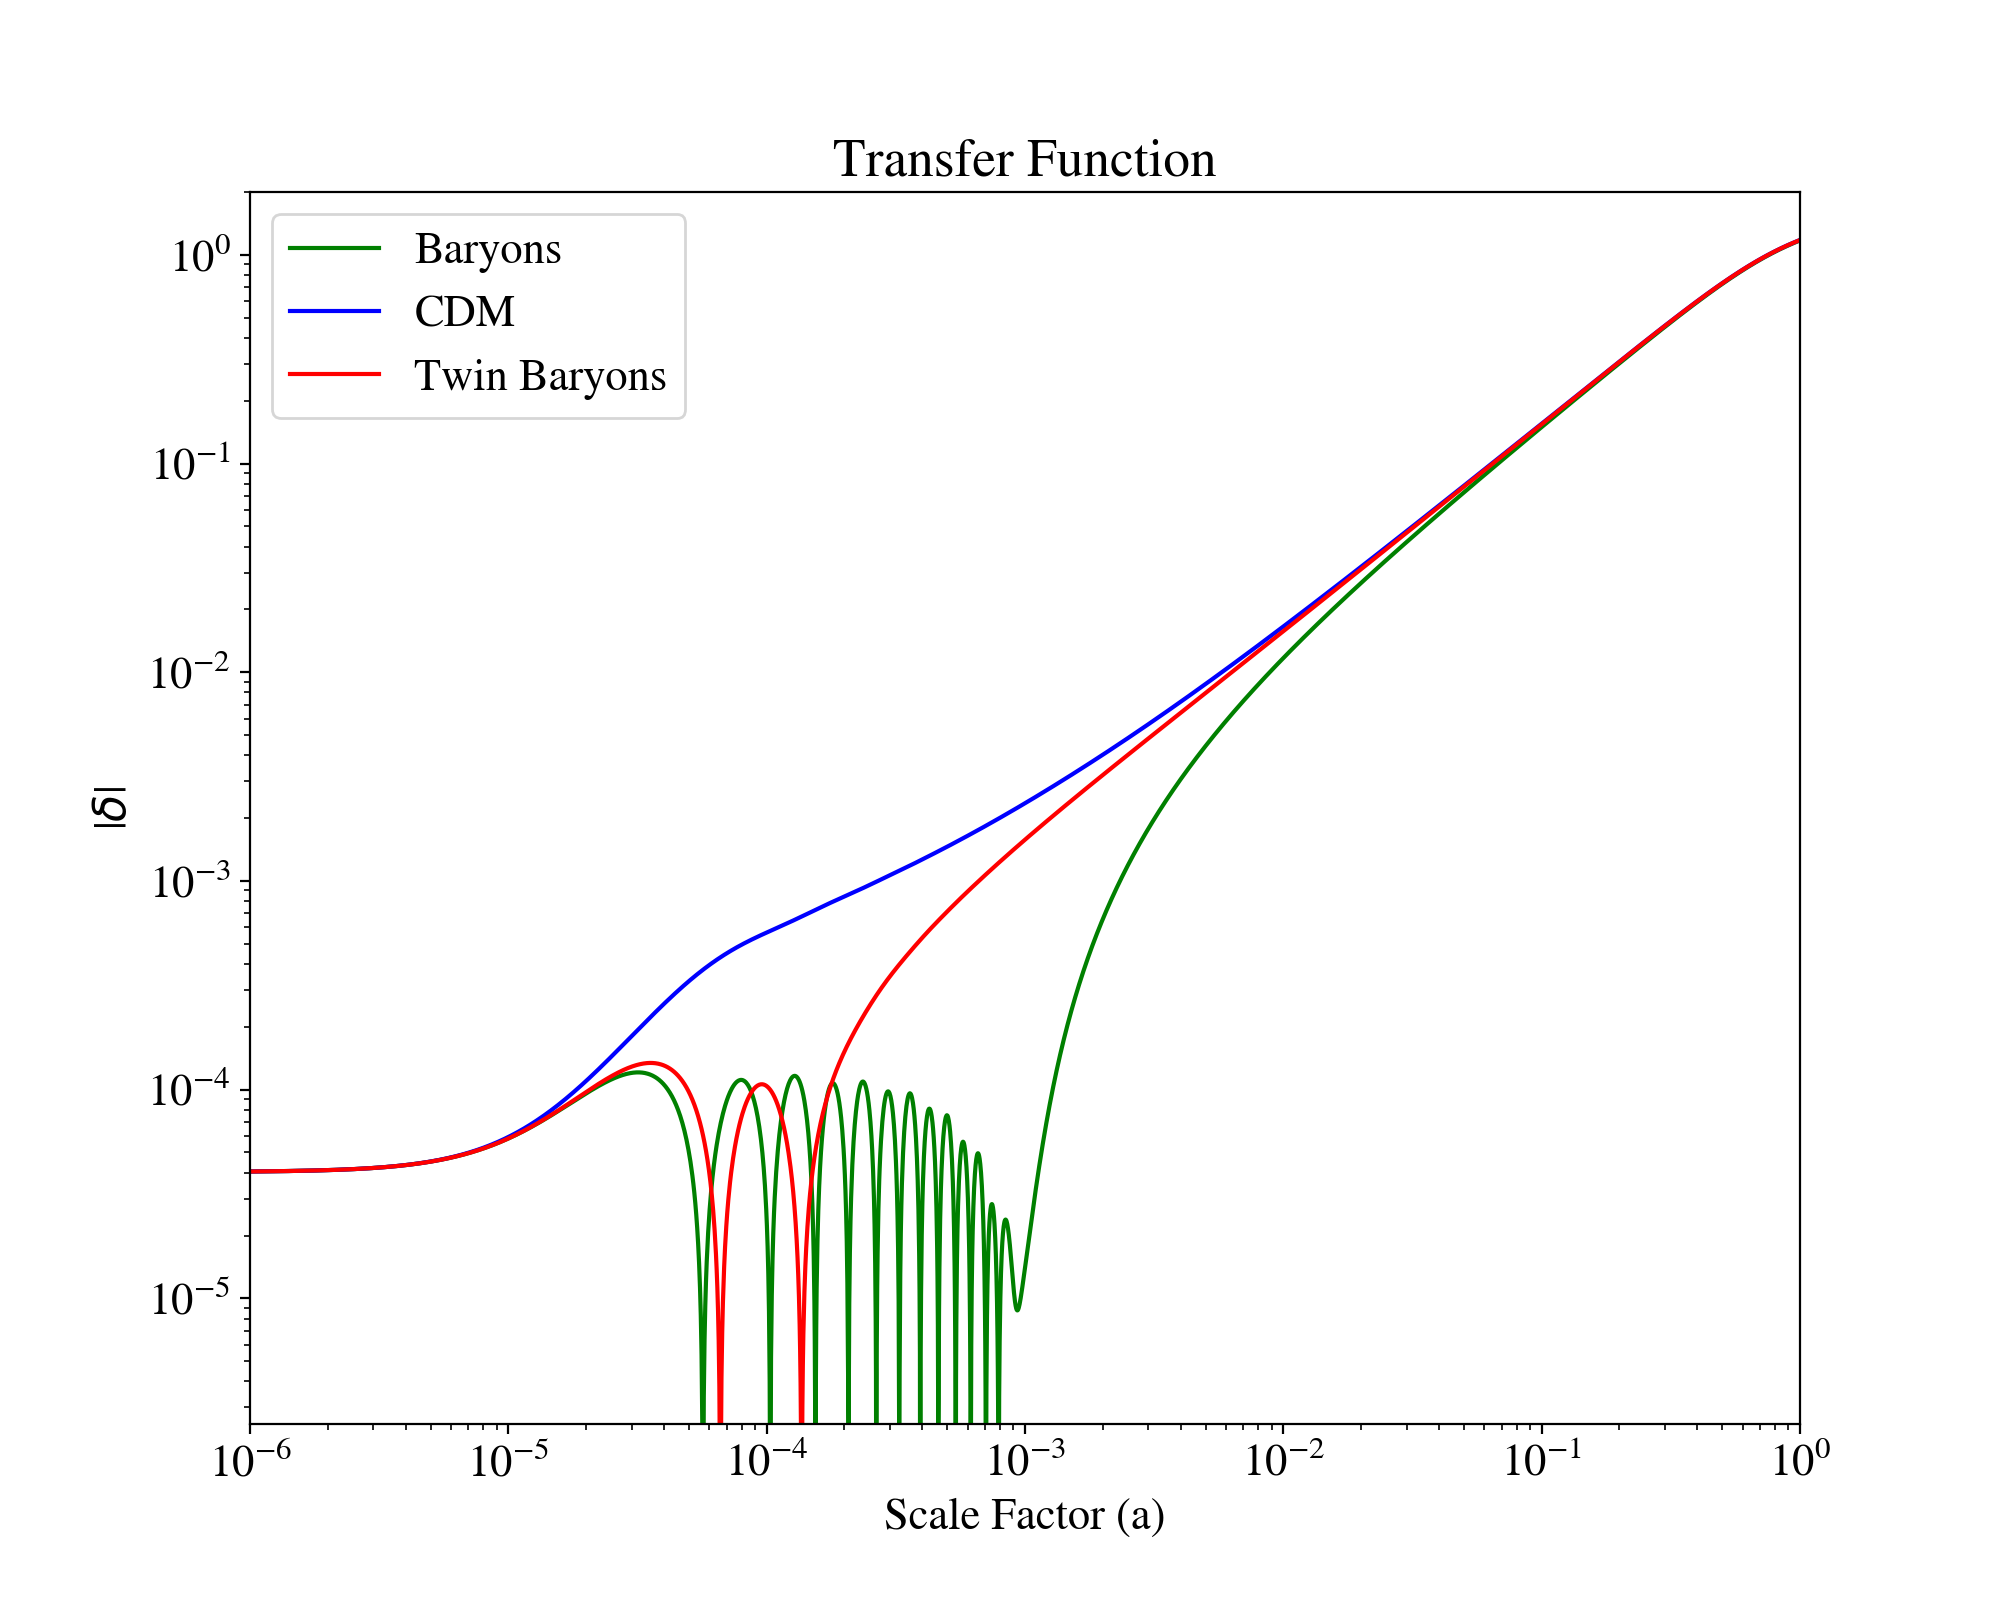

Text(0.5, 1.0, 'Transfer Function')

In [89]:
# Reading in the data

normalisation = 0.0000447214

perturbations = np.loadtxt('./../output/TwinOut_r0.100_v3.00_N0.30perturbations_k0_s.dat')
a = perturbations[:,1]
delta_b = normalisation*perturbations[:,8]
delta_cdm = normalisation*perturbations[:,20]
delta_mth = normalisation*perturbations[:,18]

plt.figure()
plt.plot(a,np.abs(delta_b),color='green',label='Baryons')
plt.plot(a,np.abs(delta_cdm),color='blue',label='CDM')
plt.plot(a,np.abs(delta_mth),color='red',label='Twin Baryons')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Scale Factor (a)')
plt.ylabel(r'|$\delta$|')
plt.ylim([2.5e-6,2.0])
plt.xlim([1.0e-6,1.0])
plt.title('Transfer Function')